                                  DECISION TREE MODEl

IMPORTING IMPORTANT LIBRARIES AND MODULES

In [264]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

IMPORTING DATASET AND MERGING

In [265]:
general_data_df = pd.read_csv('general_data.csv')
employee_df = pd.read_csv('employee_survey_data.csv')
in_time_Df = pd.read_csv('in_time.csv')
out_time_Df = pd.read_csv('out_time.csv')
manager_df = pd.read_csv('manager_survey_data.csv')
data_dict = pd.read_excel('data_dictionary.xlsx') 

LOOKING INTO THE DATA

In [266]:
#GENERAL_DATA
general_data_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [267]:
general_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [268]:
employee_df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [269]:
manager_df.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [270]:
in_time_Df.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [271]:
out_time_Df.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [272]:
data_dict.head()

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN


In [273]:
in_time_Df.isna().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [274]:
in_time_Df.fillna(0,inplace=True)
out_time_Df.fillna(0,inplace=True)

In [275]:
in_time_Df.iloc[0:,1:] = in_time_Df.iloc[0:,1:].apply(pd.to_datetime,errors='coerce')

In [276]:
out_time_Df.iloc[0:,1:] = out_time_Df.iloc[0:,1:].apply(pd.to_datetime,errors='coerce')

In [277]:
total_time=in_time_Df.append(out_time_Df)

In [278]:
total_time = total_time.diff(periods=4410)

In [279]:
total_time = total_time.iloc[4410:]

In [280]:
total_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0.0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0.0,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0.0,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0.0,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0.0,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [281]:
total_time.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05','2015-05-01','2015-07-17','2015-09-17',
                 '2015-10-02','2015-11-09','2015-11-10','2015-11-11','2015-12-25'], axis = 1,inplace=True) 

In [282]:
total_time.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [283]:
total_time['meantime'] = total_time.mean(axis=1)

In [284]:
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,meantime
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,0 days 06:52:12.823293172
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,0 days 07:18:57.493975903
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,0 days 06:48:57.891566265
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,0 days 06:47:21.172690763
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,0 days 07:52:39.220883534


In [285]:
total_time.iloc[0,249]

Timedelta('0 days 06:52:12.823293172')

In [286]:
int(str(total_time.iloc[0,249]).split()[2].split(':')[0])+int(str(total_time.iloc[0,249]).split()[2].split(':')[1])/60 + float(str(total_time.iloc[0,249]).split()[2].split(':')[2])/3600

6.870228692547778

In [287]:
total_time['meantime'] = total_time['meantime'].apply(lambda x:int(str(x).split()[2].split(':')[0])+int(str(x).split()[2].split(':')[1])/60 + float(str(x).split()[2].split(':')[2])/3600)

In [288]:
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,meantime
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,6.870229
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,7.315971
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,6.816081
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,6.789215
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,7.877561


In [289]:
total_time.reset_index(inplace=True)
total_time.head()

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,meantime
0,0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,6.870229
1,1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,7.315971
2,2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,6.816081
3,3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,6.789215
4,4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,7.877561


In [290]:
# rename index as EmployeeID (as it is the columns name in general_data) for convienience while merging datasets
total_time = total_time.rename(columns={'index': 'EmployeeID'})
total_time.head()

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,meantime
0,0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,6.870229
1,1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,7.315971
2,2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,6.816081
3,3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,6.789215
4,4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,7.877561


In [291]:
total_time.drop(columns=total_time.columns[1:-1],inplace=True)

In [292]:
total_time.head()

,EmployeeID,meantime
0,0,6.870229
1,1,7.315971
2,2,6.816081
3,3,6.789215
4,4,7.877561


In [293]:
df = pd.merge(general_data_df,manager_df,on="EmployeeID",how="inner")

In [294]:
df = pd.merge(df,employee_df,on="EmployeeID",how="inner")

In [295]:
df = pd.merge(df,total_time,on="EmployeeID",how="inner")

In [296]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,meantime
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,7.315971
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,6.816081
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,6.789215
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,7.877561
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,10.275802


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeCount            4409 non-null   int64  
 8   EmployeeID               4409 non-null   int64  
 9   Gender                   4409 non-null   object 
 10  JobLevel                 4409 non-null   int64  
 11  JobRole                  4409 non-null   object 
 12  MaritalStatus            4409 non-null   object 
 13  MonthlyIncome            4409 non-null   int64  
 14  NumCompaniesWorked      

In [298]:
object = df.select_dtypes(include='object').columns

In [299]:
for i in object:
    if len(df[i].value_counts()) == 1:
        unique = i
        print(i ,"is haveing unique columns")

Over18 is haveing unique columns


In [300]:
df.drop(['EmployeeCount',unique,'StandardHours'],axis =1,inplace=True)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeID               4409 non-null   int64  
 8   Gender                   4409 non-null   object 
 9   JobLevel                 4409 non-null   int64  
 10  JobRole                  4409 non-null   object 
 11  MaritalStatus            4409 non-null   object 
 12  MonthlyIncome            4409 non-null   int64  
 13  NumCompaniesWorked       4390 non-null   float64
 14  PercentSalaryHike       

In [302]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            37
meantime                    0
dtype: int64

Text(0.5, 0, 'NUM OF COMPANIES WORKED')

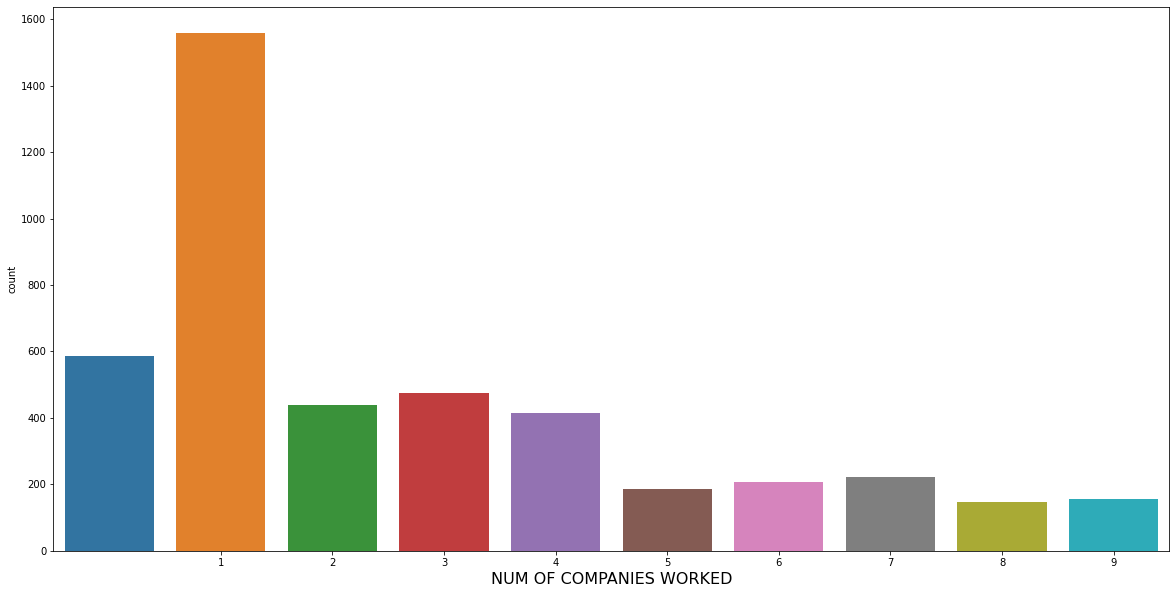

In [303]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df.NumCompaniesWorked)
ax.set(xticks=[1,2,3,4,5,6,7,8,9],xticklabels=[1,2,3,4,5,6,7,8,9]);
plt.xlabel("NUM OF COMPANIES WORKED",fontsize=16)

In [304]:
df.NumCompaniesWorked.fillna(1.0,inplace=True)

In [305]:
df.EnvironmentSatisfaction.fillna(3.0,inplace=True)

In [306]:
df.JobSatisfaction.fillna(3.0,inplace=True)

In [307]:
df.WorkLifeBalance.fillna(3.0,inplace=True)

In [308]:
df.TotalWorkingYears.fillna(10.0,inplace=True)

In [309]:
df.isna().sum().sum()

0

EXPLORARTORY DATA ANALYSIS

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeID               4409 non-null   int64  
 8   Gender                   4409 non-null   object 
 9   JobLevel                 4409 non-null   int64  
 10  JobRole                  4409 non-null   object 
 11  MaritalStatus            4409 non-null   object 
 12  MonthlyIncome            4409 non-null   int64  
 13  NumCompaniesWorked       4409 non-null   float64
 14  PercentSalaryHike       

In [311]:
df_eda = df.copy()

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

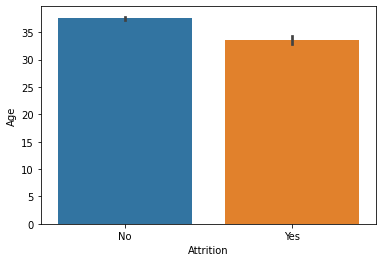

In [312]:
sns.barplot(x='Attrition',y='Age',data=df_eda)

In [313]:
# Age - Lets create buckets/bins of 10 years
df_eda.Age = pd.cut(df.Age, range(10, 70, 10)) # Create buckets of 10 years

In [314]:
df_eda.Age.value_counts()

(30, 40]    1856
(20, 30]    1074
(40, 50]     966
(50, 60]     429
(10, 20]      84
Name: Age, dtype: int64

In [315]:
def make_plot(feature_name, x_ticks = 'not_needed'):
    """This function is used to generate a countplot for the passed input feature present
    in df_eda dataframe. Appropriate plot title, xlabel, ylabel, lengend are also added.
    The last part of this function also places a percentage value over each bar of
    generated countplot.

    Args:
        feature_name: the feature name in string format.
        x_ticks: default value is 'not_needed'. If you want to customize xticks then pass
                 a list containing new xticks.

    """
    # Initialize a figure
    plt.figure(figsize = (18,7))
    
    # Generate a countplot for the passed feature_name
    ax = sns.countplot(x=feature_name, hue='Attrition', data=df_eda, palette='Set2')
    
    # Check if custom x_tick is needed or not
    if x_ticks != 'not_needed':
        # Generate index of xticks
        ticks_index = [i for i in range(len(x_ticks))]
        
        # set new xticks by passing ticks_index and custom xtick labels 
        ax.set(xticks=ticks_index, xticklabels=x_ticks)
        
    # set title, xlabel, ylabel, legend
    plt.xlabel(feature_name,fontsize  = 14,color='white')
    plt.ylabel('Employee Count',fontsize  = 14,color='white')
    plt.title('{} vs Attrition'.format(feature_name), fontsize = 18,color = 'white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.legend(fontsize = 14)

    # From axis.patches get bar lengths
    get_bars = ax.patches
    half_bar_length = int(len(get_bars)/2)
    bar_left = get_bars[:half_bar_length]
    bar_right = get_bars[half_bar_length:]
    print(len(get_bars))
    # Place %employees on top of each bar
    for L, R in zip(bar_left, bar_right):
        left_height = L.get_height()
        right_height = R.get_height()
        length_total = left_height + right_height

        # place calculated employee percentage on top of each bar
        ax.text(L.get_x() + L.get_width()/2., left_height + 30, '{0:.0%}'.format(left_height/length_total), ha="center")
        ax.text(R.get_x() + R.get_width()/2., right_height + 30, '{0:.0%}'.format(right_height/length_total), ha="center")

10


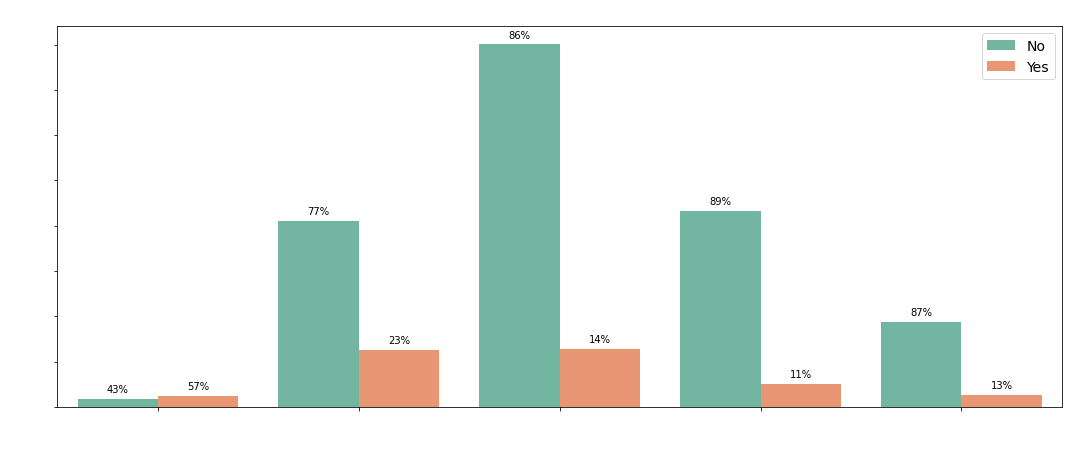

In [316]:
make_plot('Age')

[20,30] have more attrition than others
[10,20] having more attrition than others but have very less no of employees so it is not the matter of concern

6


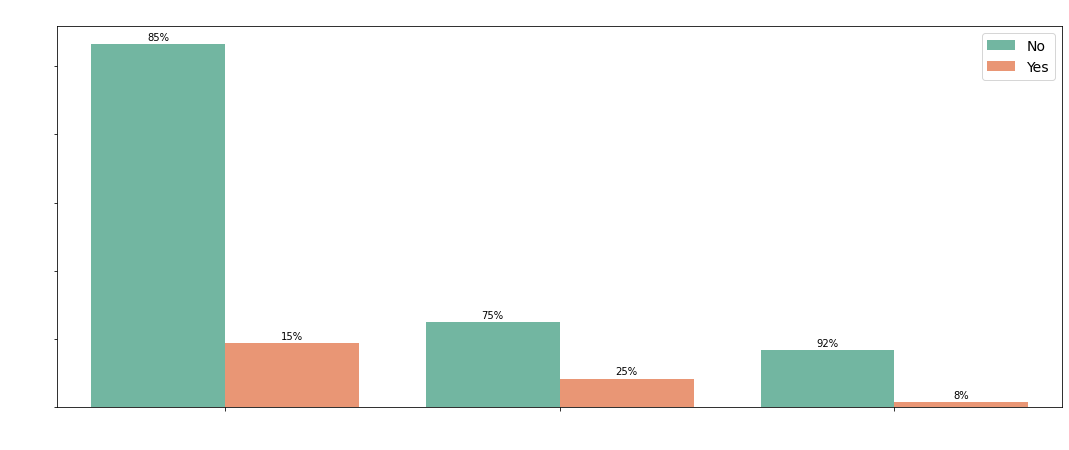

In [317]:
make_plot("BusinessTravel");

Those who travel frequestly have more level of attrition than others

6


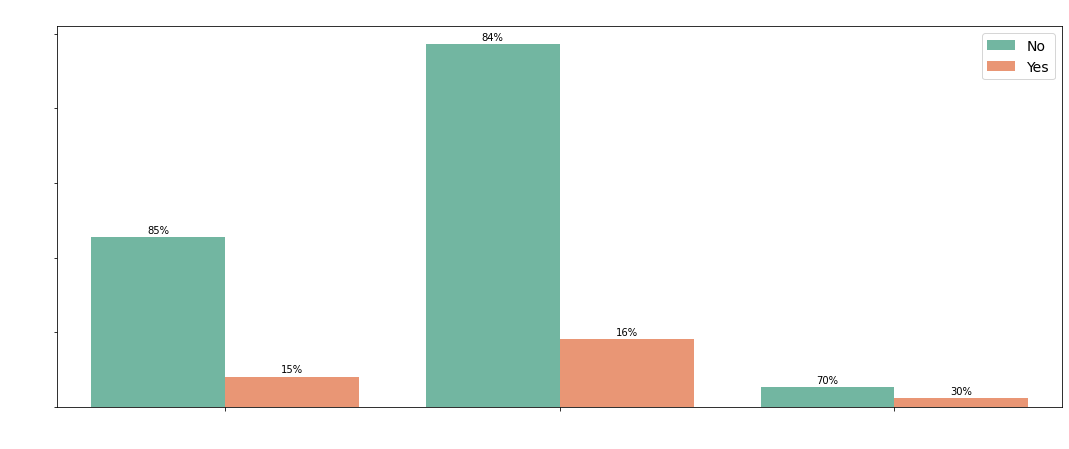

In [318]:
make_plot("Department")

1. HR department have more no of attrition than others

In [319]:
df_eda['Education'].value_counts()

3    1715
4    1194
2     846
1     510
5     144
Name: Education, dtype: int64

In [320]:
data_dict

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


10


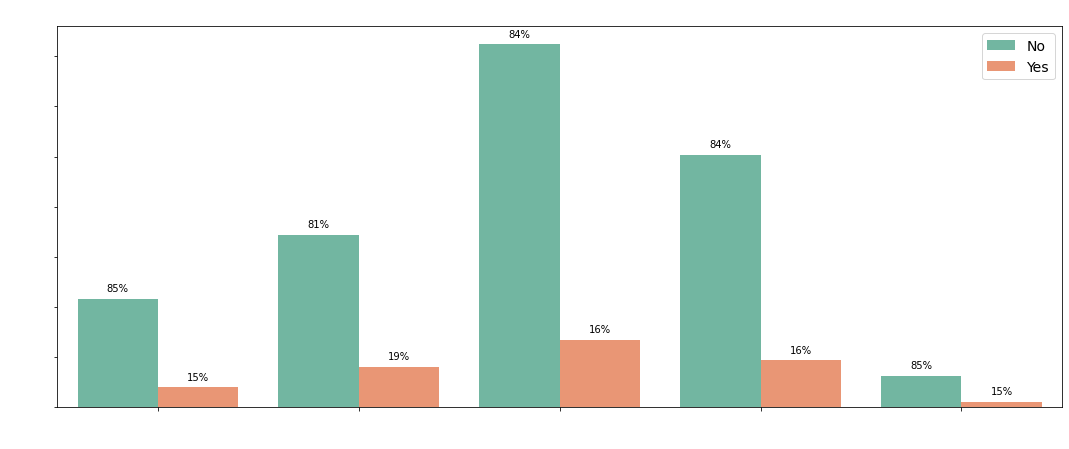

In [321]:
make_plot("Education",['Below College','College','Bachelor','Master','Doctor'])

12


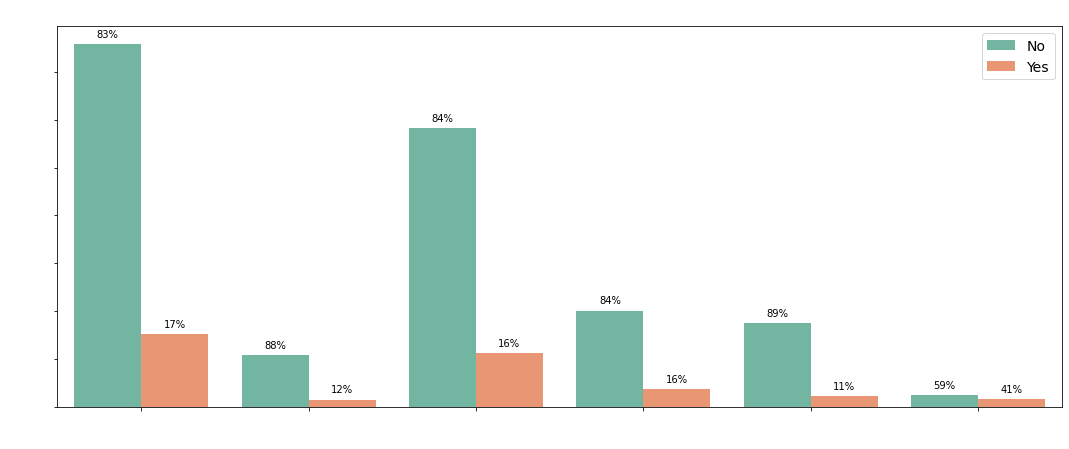

In [322]:
make_plot("EducationField")

8


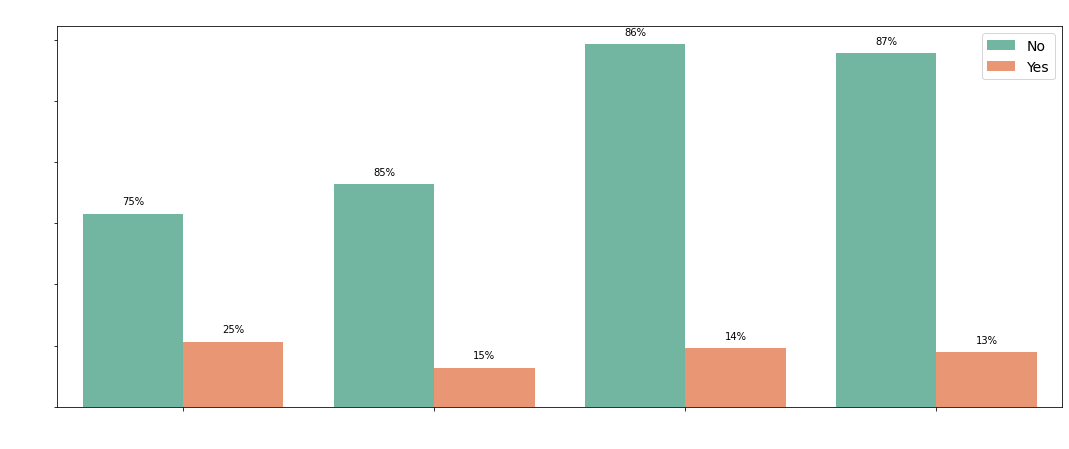

In [323]:
make_plot("EnvironmentSatisfaction",['Low','Medium','High','Very High'])

As expected employees with low Environment Satisfaction have higher level of attrition

4


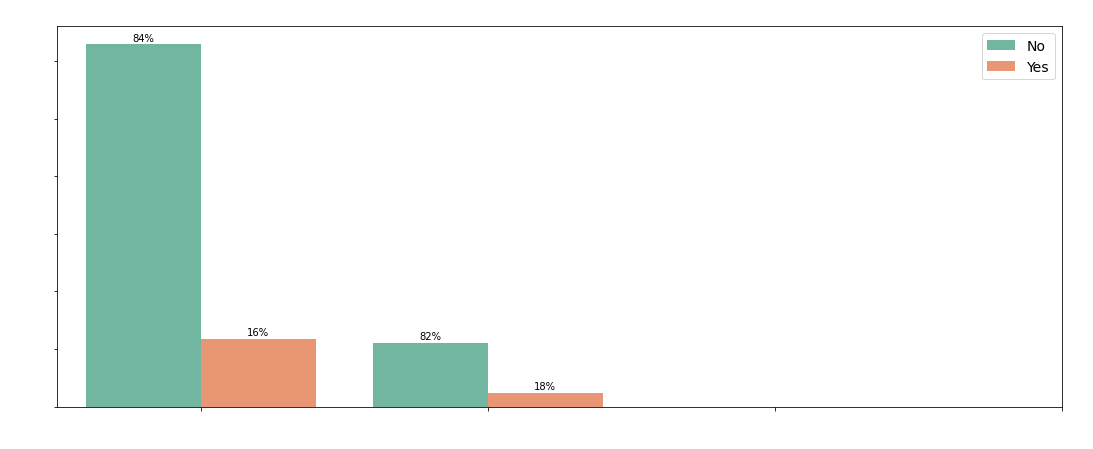

In [324]:
make_plot("PerformanceRating",['low','Medium','High','Very High'])

In [325]:
# put remaining continuous features in a list
continuous_features = ['DistanceFromHome','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany',
'YearsSinceLastPromotion','PercentSalaryHike','YearsWithCurrManager','meantime']

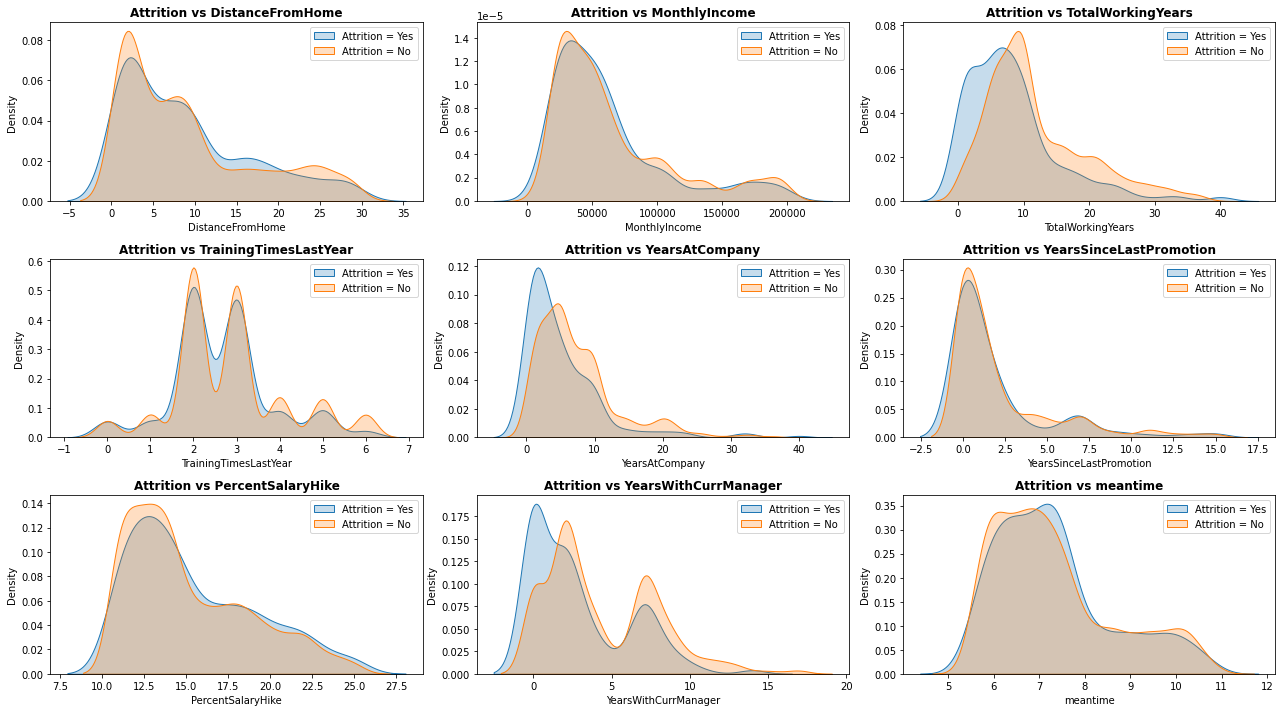

In [326]:
# Total 9 Features, so Initialize subplots having 3x3 grid
fig,ax =  plt.subplots(3,3, figsize = (18,10))

# Initialize an index which will be helpful in iterating over,
index = 0
for i in range(3):
    for j in range(3):
        # set plot title
        ax[i][j].set_title('Attrition vs %s' % (continuous_features[index]), fontsize=12, fontweight='bold')
        
        # Make kdeplot for the selected feature with respect to Attrition(yes or no) and show both curve on same plot 
        # make kdeplot for a feature when Attrition='Yes'
        sns.kdeplot(df_eda[df_eda['Attrition']=='Yes'][continuous_features[index]],shade=True,label='Attrition = Yes',ax=ax[i][j])
        
        # make kdeplot for a feature when Attrition='No'
        sns.kdeplot(df_eda[df_eda['Attrition']=='No'][continuous_features[index]],shade=True,label='Attrition = No',ax=ax[i][j]) 
        ax[i][j].legend()
        #increase index for continuous_features list in each iteration of for loop
        index += 1

# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area and labels do not overlap.
plt.tight_layout()
# plt.xticks(color='white')
plt.show()

                                                FEATURE ENCODING

In [327]:
df_copy = df.copy()


In [328]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeID               4409 non-null   int64  
 8   Gender                   4409 non-null   object 
 9   JobLevel                 4409 non-null   int64  
 10  JobRole                  4409 non-null   object 
 11  MaritalStatus            4409 non-null   object 
 12  MonthlyIncome            4409 non-null   int64  
 13  NumCompaniesWorked       4409 non-null   float64
 14  PercentSalaryHike       

In [329]:
one_hot_var = ['BusinessTravel', 'Department', 'EducationField','JobRole','MaritalStatus']
for i in one_hot_var:
    x_t = pd.get_dummies(df_copy[i],prefix=i,prefix_sep="_",drop_first=True)
    df_copy = df_copy.join(x_t)
    df_copy.drop(i,axis=1,inplace=True)

In [330]:
df_copy.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,No,6,2,1,Female,1,131160,1.0,11,...,0,0,0,0,0,0,0,0,1,0
1,31,Yes,10,1,2,Female,1,41890,0.0,23,...,0,0,0,0,0,1,0,0,0,1
2,32,No,17,4,3,Male,4,193280,1.0,15,...,0,0,0,0,0,0,1,0,1,0
3,38,No,2,5,4,Male,3,83210,3.0,11,...,1,0,0,0,0,0,0,0,1,0
4,32,No,10,1,5,Male,1,23420,4.0,12,...,0,0,0,0,0,0,1,0,0,1


In [331]:
df_copy.Attrition = df_copy.Attrition.apply(lambda x:1 if x=='Yes' else 0)
df_copy.Gender = df_copy.Gender.apply(lambda x:1 if x=='Male' else 0)

In [332]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4409 non-null   int64  
 1   Attrition                          4409 non-null   int64  
 2   DistanceFromHome                   4409 non-null   int64  
 3   Education                          4409 non-null   int64  
 4   EmployeeID                         4409 non-null   int64  
 5   Gender                             4409 non-null   int64  
 6   JobLevel                           4409 non-null   int64  
 7   MonthlyIncome                      4409 non-null   int64  
 8   NumCompaniesWorked                 4409 non-null   float64
 9   PercentSalaryHike                  4409 non-null   int64  
 10  StockOptionLevel                   4409 non-null   int64  
 11  TotalWorkingYears                  4409 non-null   float

In [333]:
y = df_copy.pop('Attrition')
x = df_copy

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=45)

In [336]:
scaler = StandardScaler()
x_train[x_train.columns[:21]] = scaler.fit_transform(x_train[x_train.columns[:21]])
x_test[x_test.columns[:21]] = scaler.fit_transform(x_test[x_test.columns[:21]])

In [337]:
df_corr = x_train.copy()

In [338]:
df_corr.corr()

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.007285,-0.036488,0.004579,-0.035152,-0.014294,-0.040683,0.306266,-0.034815,-0.030027,...,-0.015786,0.030429,0.013786,0.011068,-0.021200,0.008365,0.008747,-0.003979,0.075954,-0.121219
DistanceFromHome,-0.007285,1.000000,-0.000782,-0.008746,-0.055736,-0.025290,-0.015292,-0.026311,0.031744,0.005538,...,0.001782,0.043999,-0.017645,0.010388,-0.007455,0.011181,-0.024515,-0.000937,0.038213,-0.049864
Education,-0.036488,-0.000782,1.000000,-0.012876,-0.017273,0.034681,-0.003776,0.001485,-0.035888,0.009496,...,0.046803,-0.075508,0.039785,-0.017410,0.053475,0.019958,-0.021174,0.035260,-0.003436,0.024939
EmployeeID,0.004579,-0.008746,-0.012876,1.000000,-0.014660,-0.008343,-0.001949,0.005048,-0.013293,-0.009568,...,-0.008345,-0.015455,0.000449,0.023815,0.002901,-0.003795,-0.003593,0.007789,-0.013361,0.001942
Gender,-0.035152,-0.055736,-0.017273,-0.014660,1.000000,-0.030387,-0.002024,-0.069262,0.005095,0.040572,...,0.008450,0.019343,-0.036803,-0.016197,-0.006423,0.034146,0.001049,-0.021962,-0.044834,0.031630
JobLevel,-0.014294,-0.025290,0.034681,-0.008343,-0.030387,1.000000,0.039282,-0.023657,0.022674,0.002932,...,0.020877,-0.015393,0.005709,0.005073,0.033576,0.012858,-0.026015,-0.010997,0.010762,-0.008641
MonthlyIncome,-0.040683,-0.015292,-0.003776,-0.001949,-0.002024,0.039282,1.000000,-0.029874,0.014147,0.037369,...,-0.028643,0.021959,-0.022133,0.027095,0.005682,-0.011046,-0.003688,0.014526,0.021829,-0.055717
NumCompaniesWorked,0.306266,-0.026311,0.001485,0.005048,-0.069262,-0.023657,-0.029874,1.000000,0.019465,0.011023,...,0.012874,0.006824,0.001949,0.000754,0.008104,-0.020444,-0.012953,0.012807,-0.023841,-0.017076
PercentSalaryHike,-0.034815,0.031744,-0.035888,-0.013293,0.005095,0.022674,0.014147,0.019465,1.000000,0.003006,...,-0.028571,0.040240,0.008261,-0.011007,-0.010511,-0.021669,-0.043409,0.056313,-0.026804,0.018436
StockOptionLevel,-0.030027,0.005538,0.009496,-0.009568,0.040572,0.002932,0.037369,0.011023,0.003006,1.000000,...,-0.021519,-0.000169,-0.067073,0.033131,-0.023721,0.022172,0.038009,-0.041206,-0.040972,0.022559


<AxesSubplot:>

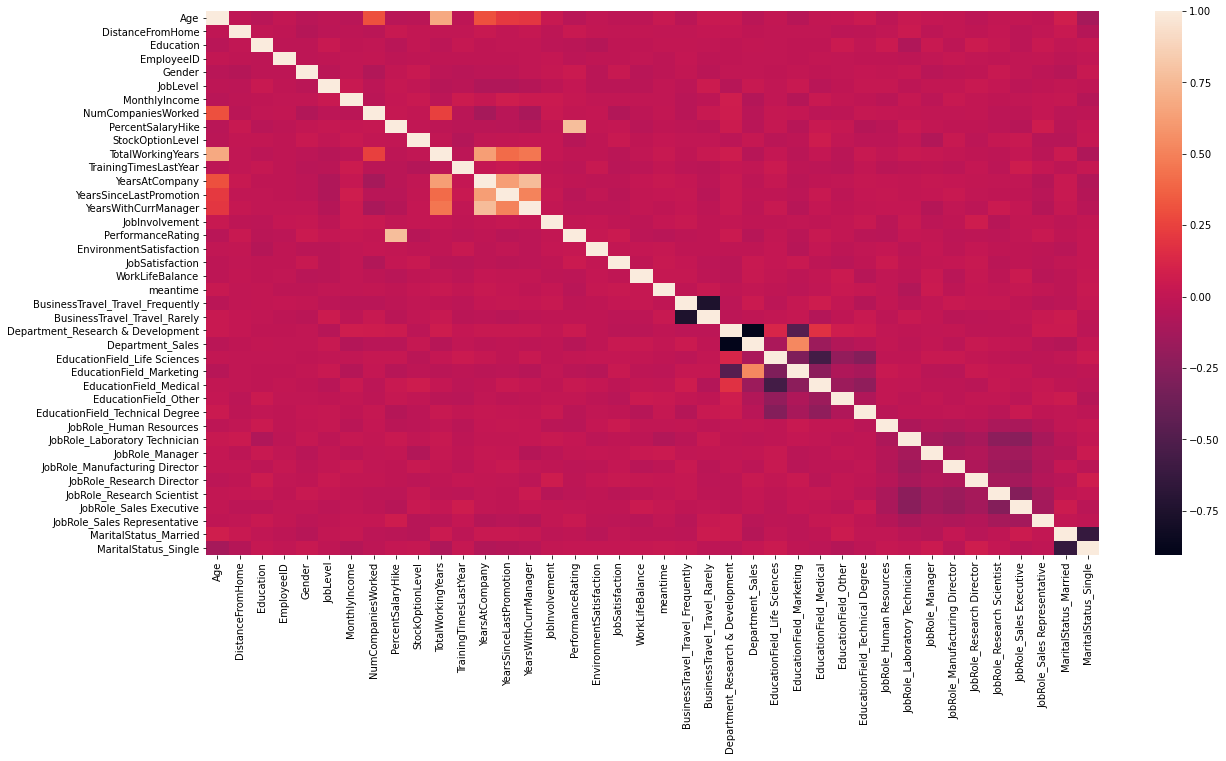

In [339]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr.corr(),cbar=True)

In [340]:
df_corr['Attrition'] = y_train

<AxesSubplot:>

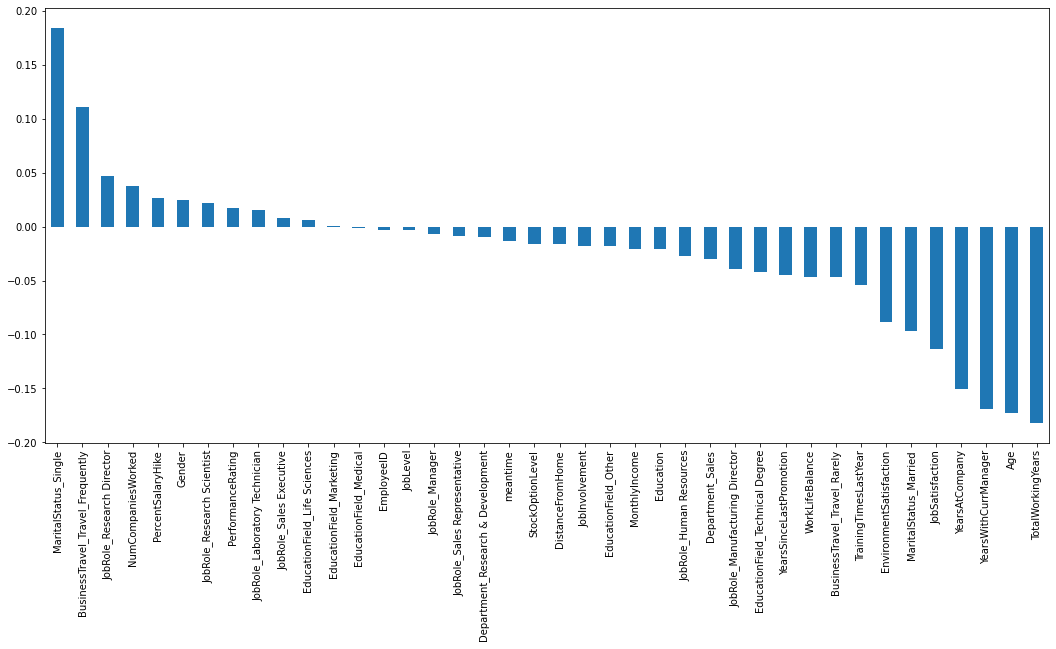

In [341]:
plt.figure(figsize=(18,8))
df_corr.corr()['Attrition'].sort_values(ascending=False)[1:].plot.bar()

In [342]:
df_corr1 = df_corr.corr()

for i in range(len(df_corr1.index)):

    for j in range(len(df_corr1.columns)):
        
        if (abs(df_corr1.iloc[i,j])>=0.8) & (abs(df_corr1.iloc[i,j]!=1)):
            print("correlation: ",df_corr1.iloc[i,j]," between-: ",df_corr1.index[i],df_corr1.columns[j])


correlation:  -0.9033974767294423  between-:  Department_Research & Development Department_Sales
correlation:  -0.9033974767294423  between-:  Department_Sales Department_Research & Development


In [343]:
x_train.drop(["Department_Research & Development","Department_Sales"],axis=1,inplace=True)


In [344]:
x_test.drop(["Department_Research & Development","Department_Sales"],axis=1,inplace=True)

In [345]:
x_train.head()

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
50,2.293626,-0.888917,0.086017,-1.691806,0.811156,-0.040151,-0.526825,-0.271085,-0.596054,1.435828,...,0,0,0,1,0,0,0,0,0,0
3178,-1.746244,0.824645,-0.901384,0.771507,0.811156,0.869020,0.494439,-0.674963,-1.147181,0.251485,...,0,0,0,0,0,0,1,0,0,1
735,-1.309501,-0.276930,1.073417,-1.152366,0.811156,-0.949322,-0.902876,-0.271085,-0.596054,2.620171,...,0,0,0,0,0,0,1,0,1,0
2860,0.983398,0.090262,0.086017,0.521080,-1.232809,-0.040151,1.922449,-0.674963,-0.871617,-0.932858,...,0,1,0,0,0,0,0,0,0,0
2369,-0.217645,2.415810,0.086017,0.134416,-1.232809,-0.040151,0.300618,-0.674963,-0.596054,0.251485,...,0,0,0,0,0,0,1,0,1,0


                                                    MODEL BUILDING

In [346]:
df1 = pd.DataFrame({'Attrition':[1,0,1,0,0,0,1],'JobSatisfaction':[1,2,3,2,1,1,1],'EnvironmentSatifaction':[1,3,0,1,2,1,1]})

<AxesSubplot:>

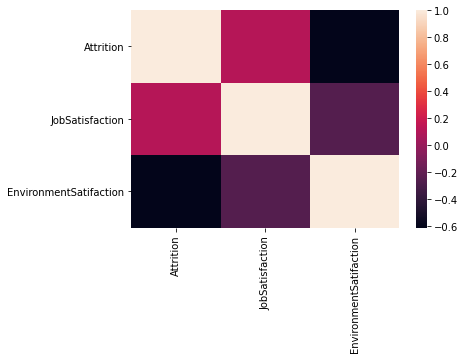

In [347]:
sns.heatmap(df1.corr())

In [348]:
from sklearn.tree import DecisionTreeClassifier

In [349]:
y = df1.pop('Attrition')
x = df1

In [350]:
model1 = DecisionTreeClassifier(random_state=1)

In [351]:
model1.fit(x,y)

DecisionTreeClassifier(random_state=1)

In [352]:
predictions = model1.predict(x)

In [353]:
predictions


array([1, 0, 1, 0, 0, 1, 1], dtype=int64)

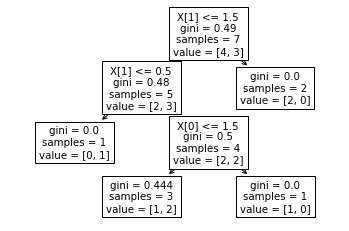

In [354]:
from sklearn import tree
tree.plot_tree(model1,filled=False);

In [355]:
from sklearn.model_selection import cross_val_score
dt_cv = DecisionTreeClassifier(random_state=1)
score = cross_val_score(dt_cv,x_train,y_train,cv=5,scoring='accuracy').mean()
round(score,3)

0.94

                                                  OVERSAMPLING THE DATA

In [356]:
from imblearn.over_sampling import SMOTE
learn = SMOTE()
X_os,Y_os = learn.fit_resample(x_train,y_train) 

In [357]:
dt_cv = DecisionTreeClassifier(max_depth=10)
score2 = cross_val_score(dt_cv,X_os,Y_os,cv=5,scoring="accuracy").mean()

In [358]:
score2

0.8979061406045042

                                                    HYPERPARAMETER TUNING

In [359]:
from sklearn.model_selection import GridSearchCV

grid = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 15,20,25,30], 
              'min_samples_split': [4, 6, 10,15,20],
              'min_samples_leaf': [1, 5, 8]
             }
gs_dt = GridSearchCV(DecisionTreeClassifier(),grid,n_jobs=-1,verbose=2,scoring="accuracy",return_train_score=True)
gs_dt.fit(X_os,Y_os)
print('Best Parameters :',gs_dt.best_params_)
print('Mean Train Score :',round(gs_dt.cv_results_['mean_train_score'].mean(),4))
print('Mean Test Score :',round(gs_dt.cv_results_['mean_test_score'].mean(),4))
print('Best Test  Score :',round(gs_dt.best_score_,4))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters : {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
Mean Train Score : 0.8298
Mean Test Score : 0.7911
Best Test  Score : 0.9499


In [366]:
dt_cv = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=30,max_features='sqrt',min_samples_leaf=1,min_samples_split=4)

In [367]:
y_pred = dt_cv.fit(X_os,Y_os).predict(x_test)

In [368]:
dt_cv.score(x_test,y_test)

0.6455122393472348

In [363]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [364]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [369]:
print('Accuracy  score : ' + str(round(accuracy_score(y_test,y_pred),3)))


print('Precision score : ' + str(round(precision_score(y_test,y_pred),3)))
print('Recall    score : ' + str(round(recall_score(y_test,y_pred),3)))
print('F1        score : ' + str(round(f1_score(y_test,y_pred),3)))

print('\nConfusion Matrix\n' + str(confusion_matrix(y_test, y_pred)))

Accuracy  score : 0.646
Precision score : 0.289
Recall    score : 0.872
F1        score : 0.434

Confusion Matrix
[[562 369]
 [ 22 150]]
